#file to test calibration parameters

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load calibration data (ensure your file contains 'intrinsic' and 'dist_coeffs')
data = np.load('calib_left.npz')
intrinsics = data['intrinsic']
print(intrinsics)
# Ensure distortion coefficients are available in the file.
if 'dist_coeffs' in data:
    dist_coeffs = data['dist_coeffs']
else:
    raise ValueError("Distortion coefficients not found in the calibration file. "
                     "Please save them along with the intrinsics.")

[[1.42487334e+03 0.00000000e+00 9.62651637e+02]
 [0.00000000e+00 1.42496118e+03 5.33241114e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


In [3]:
# Load a test image to undistort
img = cv2.imread("./calibration_images/img_0006.jpg")
if img is None:
    raise ValueError("Could not load image. Check the file path.")


In [4]:
h, w = img.shape[:2]

# Compute the optimal new camera matrix (optional but recommended)
new_camera_mtx, roi = cv2.getOptimalNewCameraMatrix(intrinsics, dist_coeffs, (w, h), 1, (w, h))

# Undistort the image
undistorted_img = cv2.undistort(img, intrinsics, dist_coeffs, None, new_camera_mtx)

# Optionally, crop the image based on the ROI (Region of Interest)
x, y, w, h = roi
undistorted_img = undistorted_img[y:y+h, x:x+w]


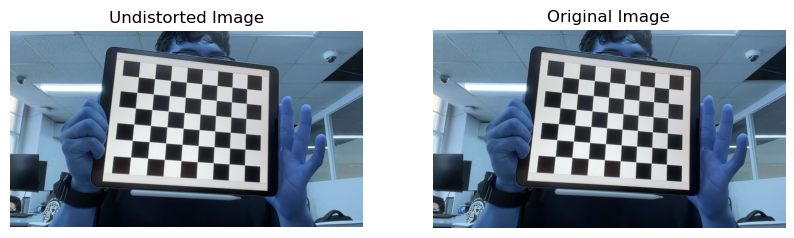

In [5]:
# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # Adjust figsize as needed

# Show the first image
axes[0].imshow(undistorted_img)
axes[0].set_title("Undistorted Image")
axes[0].axis("off")  # Hide axis for better visualization

# Show the second image
axes[1].imshow(img)
axes[1].set_title("Original Image")
axes[1].axis("off")

# Show the figure
plt.show()